# PROBLEM STATEMENT

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)  and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.



# VARIABLE INFORMATION

0 Date (DD/MM/YYYY)  
1 Time (HH.MM.SS)   
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)  
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) 
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)   
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)   
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)   
7 True hourly averaged NOx concentration in ppb (reference analyzer)   
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)   
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)  
 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)   
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)   
12 Temperature in Â°C  
 13 Relative Humidity (%)   
14 AH Absolute Humidity  


# IMPORTING BASIC LIBRARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# READ DATASET

In [2]:
data = pd.read_table(r"C:\Users\Pragya\Documents\Copy of AirQualityUCI.csv",delimiter=",")
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


# EDA

**1. SHAPE**

In [3]:
data.shape

(9471, 17)

**2. COLUMNS**

In [4]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

**3. DESCRIPTIVE STATISTICS**

In [5]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


**4. SUMMARIZE INFO**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


**5. DATA TYPES**

In [7]:
data.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

**6. ANAMOLY DETECTION**

In [8]:
for i in data.columns:
    print({i:data[i].unique()})

{'Date': array(['10-03-2004', '11-03-2004', '12-03-2004', '13-03-2004',
       '14-03-2004', '15-03-2004', '16-03-2004', '17-03-2004',
       '18-03-2004', '19-03-2004', '20-03-2004', '21-03-2004',
       '22-03-2004', '23-03-2004', '24-03-2004', '25-03-2004',
       '26-03-2004', '27-03-2004', '28-03-2004', '29-03-2004',
       '30-03-2004', '31-03-2004', '01-04-2004', '02-04-2004',
       '03-04-2004', '04-04-2004', '05-04-2004', '06-04-2004',
       '07-04-2004', '08-04-2004', '09-04-2004', '10-04-2004',
       '11-04-2004', '12-04-2004', '13-04-2004', '14-04-2004',
       '15-04-2004', '16-04-2004', '17-04-2004', '18-04-2004',
       '19-04-2004', '20-04-2004', '21-04-2004', '22-04-2004',
       '23-04-2004', '24-04-2004', '25-04-2004', '26-04-2004',
       '27-04-2004', '28-04-2004', '29-04-2004', '30-04-2004',
       '01-05-2004', '02-05-2004', '03-05-2004', '04-05-2004',
       '05-05-2004', '06-05-2004', '07-05-2004', '08-05-2004',
       '09-05-2004', '10-05-2004', '11-05-2004

**7. MISSING VALUES**

In [46]:
data.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

**10. COMPARING MEAN, MEDIAN, MODE**

In [47]:
for col in data.select_dtypes(include=['number']).columns:
    print(f"{col}: Mean={data[col].mean()},Median = {data[col].median()},Mode = {data[col].mode()},\n")

CO(GT): Mean=-34.207523778989,Median = 1.5,Mode = 0   -200.0
Name: CO(GT), dtype: float64,

PT08.S1(CO): Mean=1048.9900609169606,Median = 1053.0,Mode = 0   -200.0
Name: PT08.S1(CO), dtype: float64,

NMHC(GT): Mean=-159.09009297851875,Median = -200.0,Mode = 0   -200.0
Name: NMHC(GT), dtype: float64,

C6H6(GT): Mean=1.8656834455487867,Median = 7.9,Mode = 0   -200.0
Name: C6H6(GT), dtype: float64,

PT08.S2(NMHC): Mean=894.5952762637597,Median = 895.0,Mode = 0   -200.0
Name: PT08.S2(NMHC), dtype: float64,

NOx(GT): Mean=168.6169712514695,Median = 141.0,Mode = 0   -200.0
Name: NOx(GT), dtype: float64,

PT08.S3(NOx): Mean=794.9901677888212,Median = 794.0,Mode = 0   -200.0
Name: PT08.S3(NOx), dtype: float64,

NO2(GT): Mean=58.14887250187026,Median = 96.0,Mode = 0   -200.0
Name: NO2(GT), dtype: float64,

PT08.S4(NO2): Mean=1391.4796409105481,Median = 1446.0,Mode = 0   -200.0
Name: PT08.S4(NO2), dtype: float64,

PT08.S5(O3): Mean=975.0720316340708,Median = 942.0,Mode = 0   -200.0
Name: PT08.S5(

**11. DUPLICATED VALUES**

In [48]:
data.duplicated().sum()

113

# DATA VISUALIZATION

**Insight 1: Temperature vs Relative Humidity**  

Temperature aur humidity ka inverse relation hota hai. Jab temperature badhta hai, toh humidity kam hoti hai aur vice-versa.

Yeh check karne ke liye hum scatter plot banayenge, jo dikhayega ki kya T aur RH ke beech koi strong relation hai.

Expectation:
Agar negative correlation hai, toh points downward slope me dikhenge.


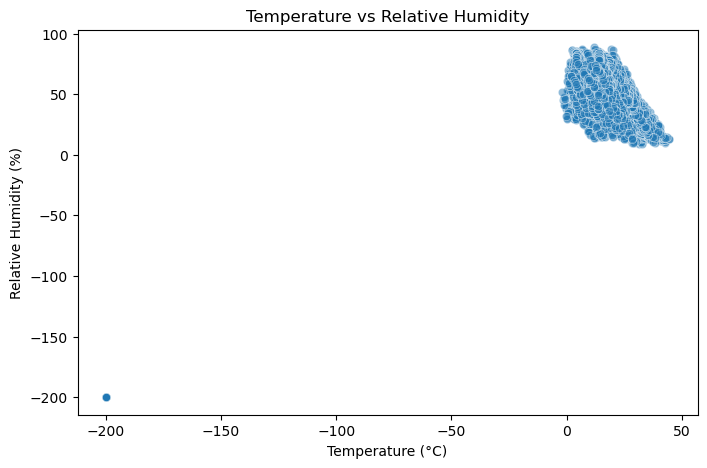

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Temperature vs Relative Humidity
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['T'], y=data['RH'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.title('Temperature vs Relative Humidity')
plt.show()

**Insight 2: Temperature vs Absolute Humidity**  

Why?

Absolute Humidity (AH) directly depends on temperature, unlike relative humidity.

Dekhna hai ki T aur AH ke beech linear ya non-linear relation hai.

Expectation:
Positive correlation hona chahiye, kyunki garam hawa zyada moisture hold kar sakti hai.

Scatter plot me upward trend dikhna chahiye.


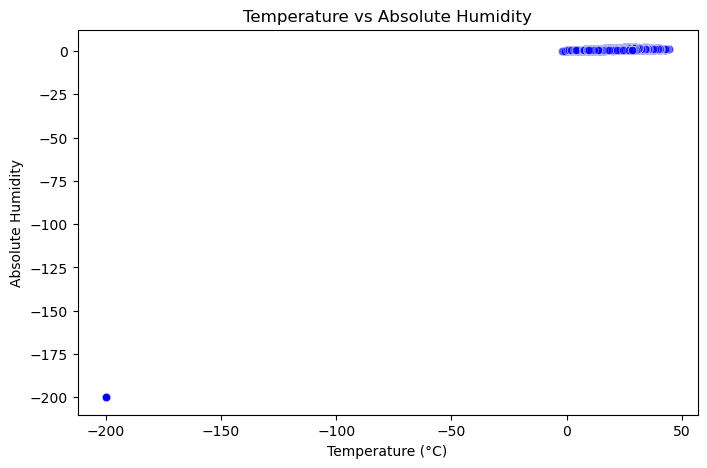

In [8]:
# Scatter Plot: Temperature vs Absolute Humidity
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['T'], y=data['AH'], alpha=0.5, color='b')
plt.xlabel('Temperature (°C)')
plt.ylabel('Absolute Humidity')
plt.title('Temperature vs Absolute Humidity')
plt.show()

**Insight 3: Temperature vs Air Pollution (CO, NOx, NO2, C6H6)**  


Why?

Temperature pollution levels ko affect kar sakta hai.

High temperature pe pollutants disperse ho sakte hain, aur cold weather me zyada accumulate hote hain.

Ye check karna hai ki T aur different pollutants (CO(GT), NOx(GT), NO2(GT), C6H6(GT)) ka relation kaisa hai.

Expectation:
Negative correlation ho sakta hai, kyunki zyadatar pollutants thande weather me accumulate hote hain.

Scatter plot me downward slope ya non-linear pattern ho sakta hai.


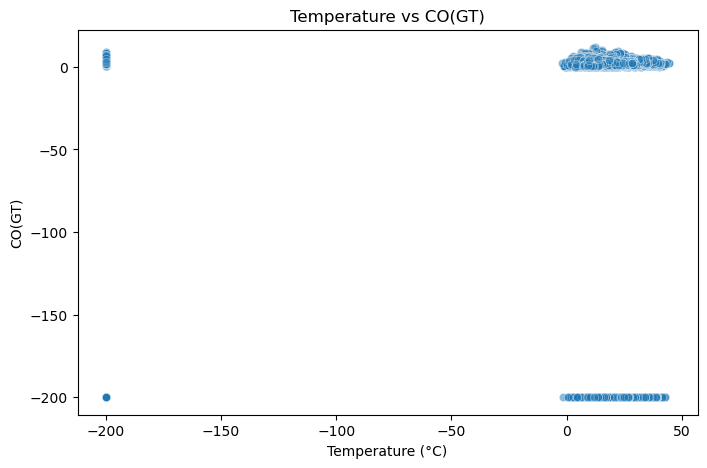

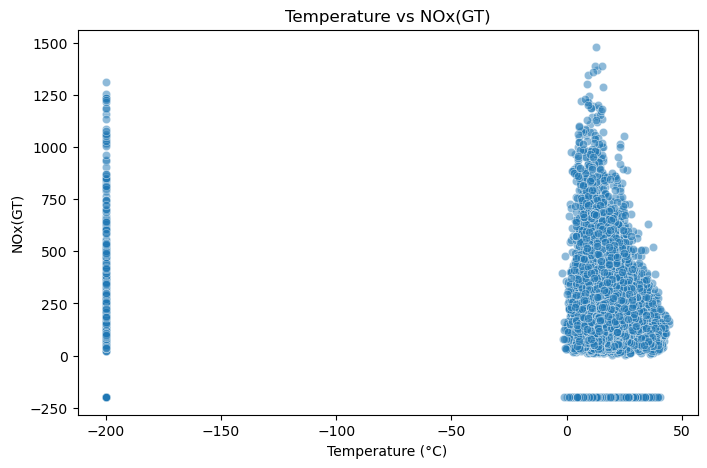

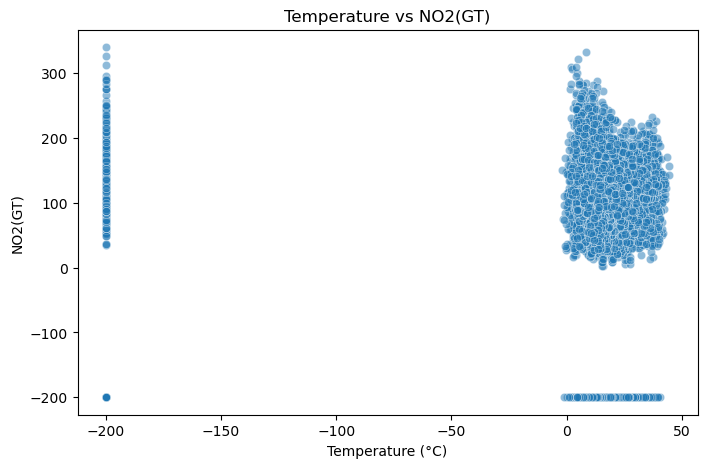

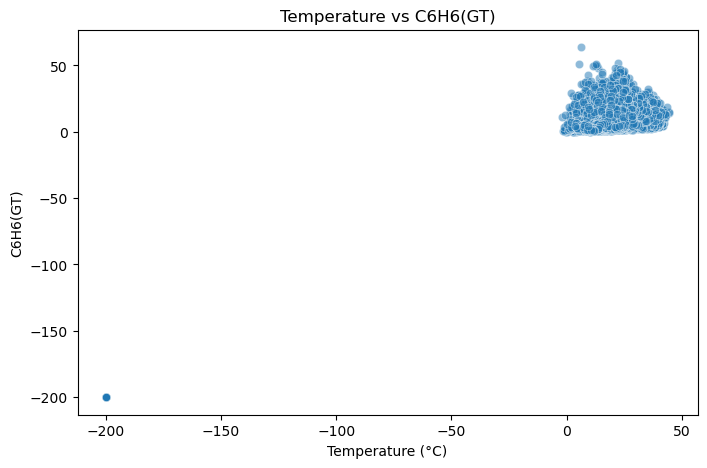

In [9]:
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']

for pollutant in pollutants:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=data['T'], y=data[pollutant], alpha=0.5)
    plt.xlabel('Temperature (°C)')
    plt.ylabel(pollutant)
    plt.title(f'Temperature vs {pollutant}')
    plt.show()

**Insight 4: Temperature Trend Over Time**  

Why?

Dekhna hai ki temperature din bhar ya mahino me kaise badal raha hai.

Time series plot se seasonality, trends aur anomalies samajh aa sakti hain.

Expectation:
Temperature ka daily cycle dikhna chahiye (subah kam, din me zyada, raat me phir kam).

Agar data lambe samay ka hai, toh seasonal trend bhi dikh sakta hai.


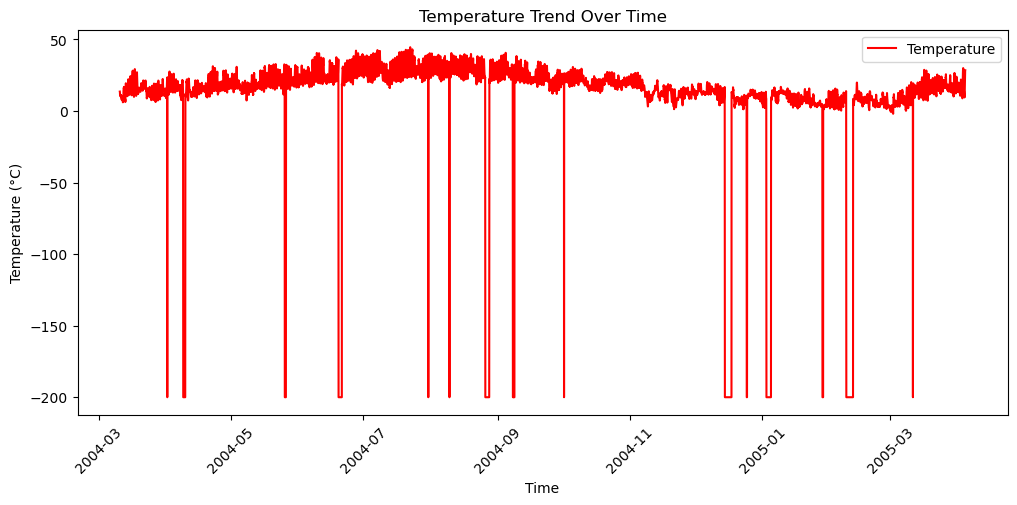

In [11]:
# Convert Date and Time to datetime format with dayfirst=True
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True, errors='coerce')

# Drop rows where DateTime could not be parsed
df = data.dropna(subset=['DateTime'])

# Sort data by DateTime
df = df.sort_values(by='DateTime')

# Time Series Plot: Temperature over Time
plt.figure(figsize=(12,5))
plt.plot(df['DateTime'], df['T'], label='Temperature', color='r')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# DATA PREPROCESSING

**1. FEATURE SELECTION**

In [49]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [50]:
data.drop(['Date', 'Time','Unnamed: 15', 'Unnamed: 16'],axis=1,inplace=True)

Here i am dropping variable like data, time because they are irrelevant for my analysis.  
Variables like unnamed: 15, unnamed: 16, because the containg missing values more than 50%.                                                                    

**2. HANDLING DUPLICATES**

In [51]:
data.duplicated().sum()

144

In [52]:
data.drop_duplicates(inplace=True)

**3. MISSING VALUES**

In [53]:
data.isnull().sum()

CO(GT)           1
PT08.S1(CO)      1
NMHC(GT)         1
C6H6(GT)         1
PT08.S2(NMHC)    1
NOx(GT)          1
PT08.S3(NOx)     1
NO2(GT)          1
PT08.S4(NO2)     1
PT08.S5(O3)      1
T                1
RH               1
AH               1
dtype: int64

**4. ASSUMPTION CHECKING : THERE SHOULD BE NO OUTLIERS**

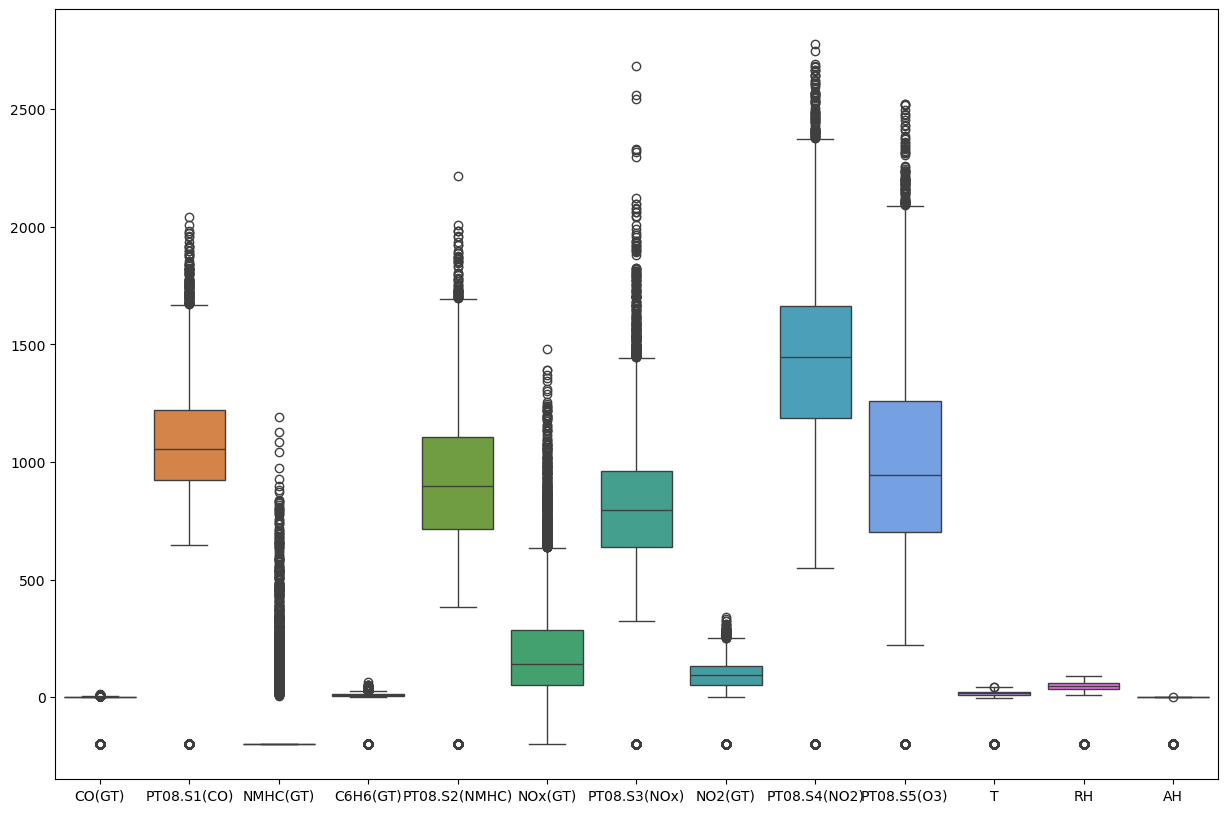

In [54]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=data)
plt.show()

The value -200, which was detected as an outlier, is not logically valid.  
Therefore, I am replacing it using bfill and ffill.  
This is because it is possible that the chemical concentration in the environment from yesterday is still present today.  
Instead of replacing it with a single value, I am using both bfill and ffill for better consistency.

In [55]:
import numpy as np

# Replace all occurrences of -200 with NaN
data.replace(-200, np.nan, inplace=True)

In [56]:
data.isnull().sum()

CO(GT)           1654
PT08.S1(CO)       336
NMHC(GT)         8413
C6H6(GT)          336
PT08.S2(NMHC)     336
NOx(GT)          1609
PT08.S3(NOx)      336
NO2(GT)          1612
PT08.S4(NO2)      336
PT08.S5(O3)       336
T                 336
RH                336
AH                336
dtype: int64

**APPLYING BFILL AND FFILL**

In [57]:
data.fillna(method="bfill", inplace=True)
data.fillna(method="ffill", inplace=True)

**RECHECKING FOR MISSING VALUES**

In [58]:
data.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

**5. ASSUMPTION: THERE SHOULD BE LINEAR RELATIONSHIP BETWEEN VARIABLES**

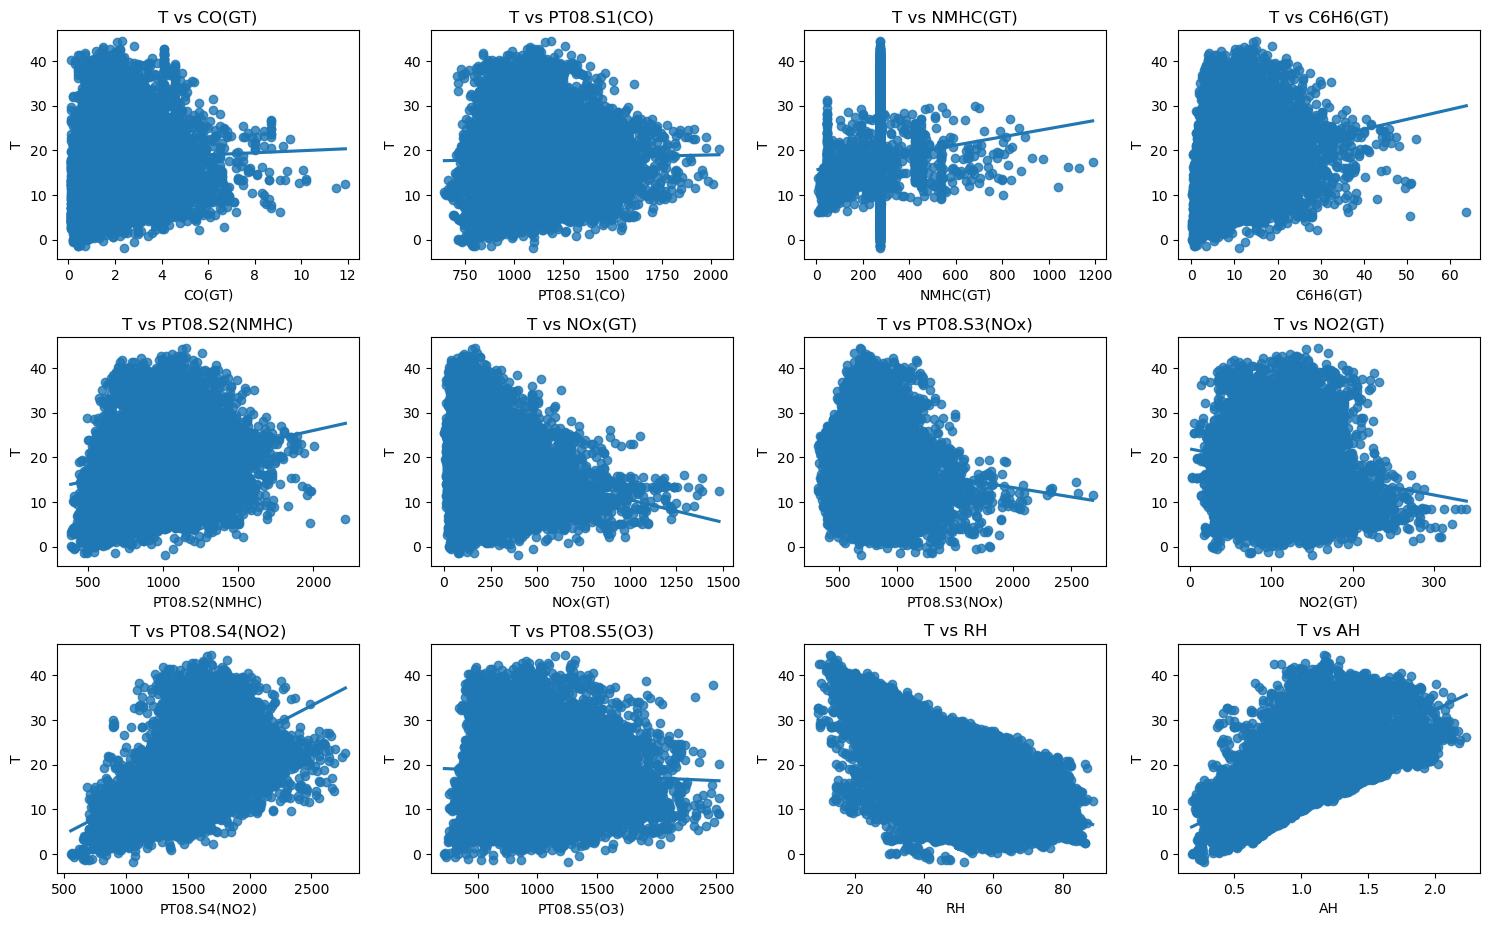

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns except 'T' itself
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop("T")  # Exclude 'T' itself

# Plotting regression plots for each column against 'T'
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on number of columns
    sns.regplot(data=data, x=col, y="T", ci=None)
    plt.title(f"T vs {col}")

plt.tight_layout()
plt.show()

**CREATING X AND Y**

In [60]:
X = data.loc[:,['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
        'RH', 'AH']]
Y = data.loc[:,'T']


In [61]:
print(X.shape)
print(Y.shape)

(9327, 12)
(9327,)


**6. ASSUMPTION: DATA SHOULD BE NORMALLY DISTRIBUTED**

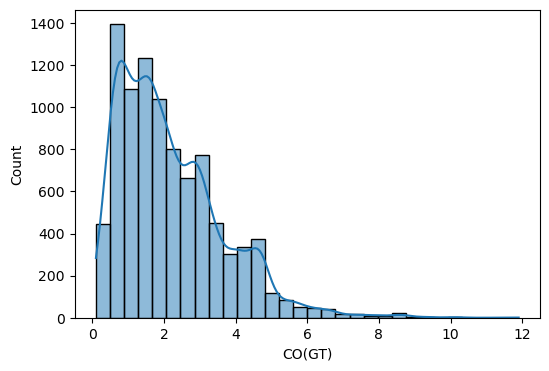

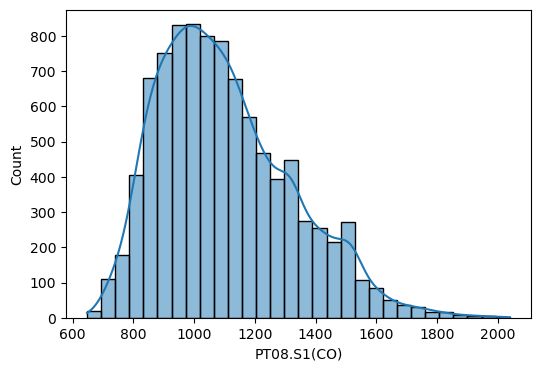

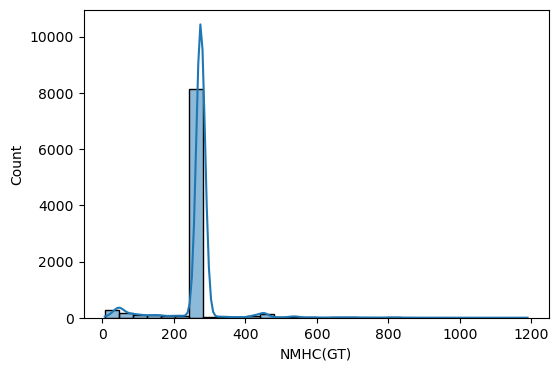

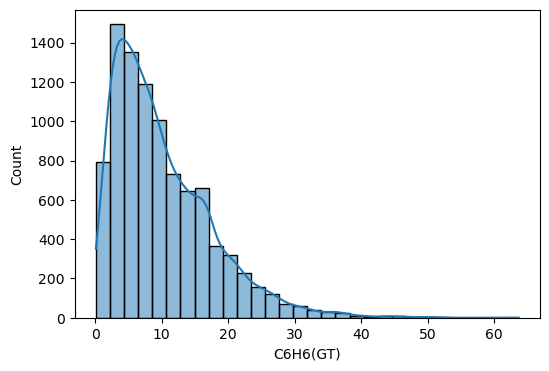

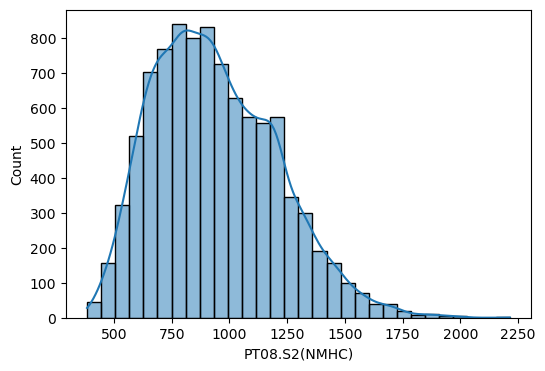

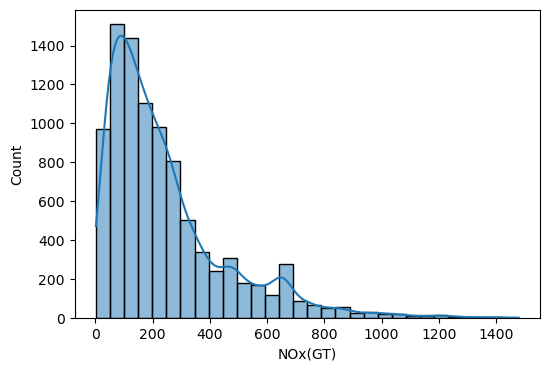

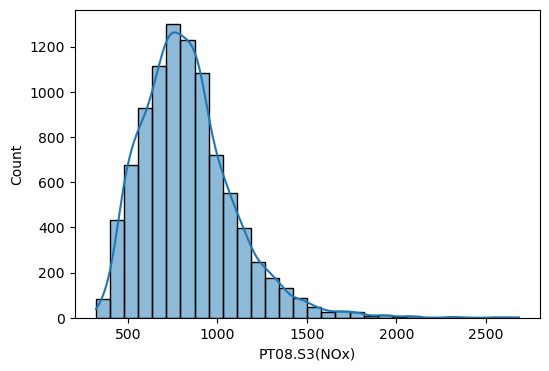

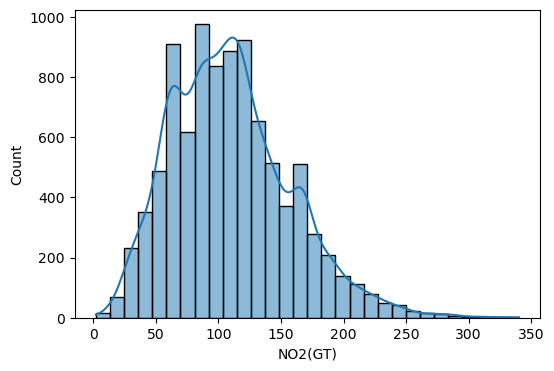

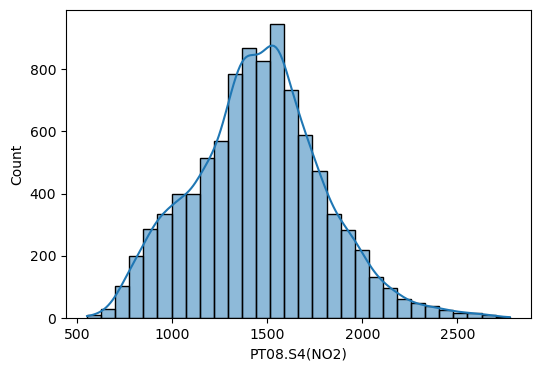

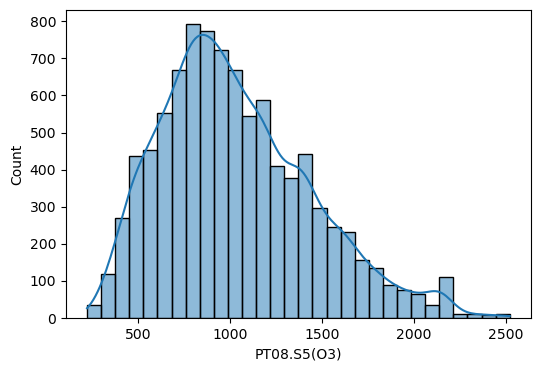

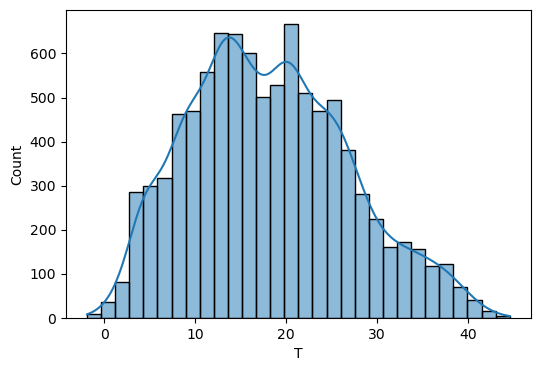

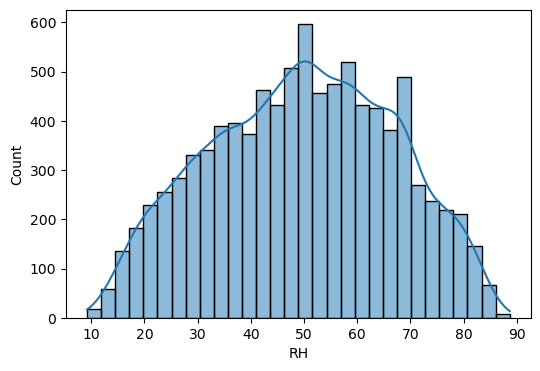

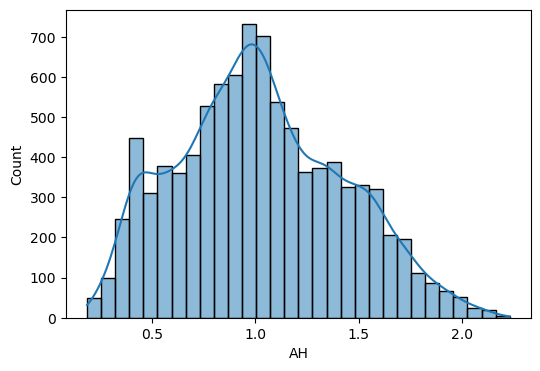

In [62]:
# NORMALITY OF ALL X VARIABLES

for column in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[column],kde=True,bins=30)
plt.show()

In [ ]:
# NORMALITY OF Y VARIABLE 

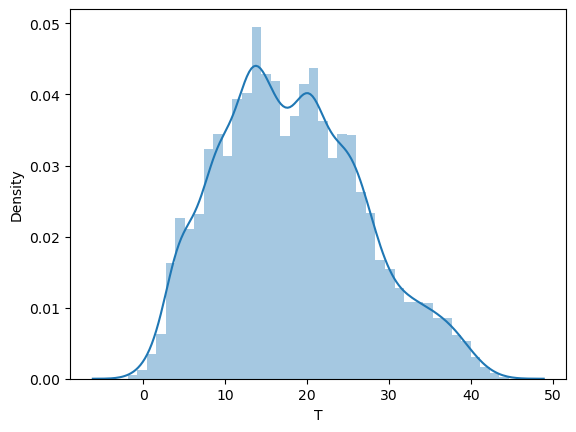

In [63]:
import seaborn as sns
sns.distplot(Y)
plt.show()

**FETCHING VARIABLES THAT ARE HIGHLY SKEWED, SKEWNESS VALUE GREATER THAN 0.75**

In [64]:
from scipy.stats import skew

#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))

#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)

CO(GT)           1.205314
PT08.S1(CO)      0.700515
NMHC(GT)         1.410732
C6H6(GT)         1.331974
PT08.S2(NMHC)    0.534150
NOx(GT)          1.665339
PT08.S3(NOx)     1.085028
NO2(GT)          0.641436
PT08.S4(NO2)     0.216850
PT08.S5(O3)      0.655922
RH              -0.082565
AH               0.259852
dtype: float64
CO(GT)          1.205314
NMHC(GT)        1.410732
C6H6(GT)        1.331974
NOx(GT)         1.665339
PT08.S3(NOx)    1.085028
dtype: float64


**APPLYING LOG 1P TRANSFORMATION INTO SKEWED VRIABLE**

In [65]:
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75   
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])   

**SPLITTING DATA INTO TEST AND TRAIN**

In [66]:
from sklearn.model_selection import train_test_split

#split the data into test and train 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

# MODEL BUILDING

# LINEAR REGRESSION

**FITTING MODEL OBJECT**

In [69]:
from sklearn.linear_model import LinearRegression

# create a model object
lm=LinearRegression()

**FITTING MODEL OBJECT**

In [70]:
# print the model object
lm.fit(X_train,Y_train)

LinearRegression()

**PRINTING BETA PARAMETERS**

In [71]:
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

11.165095462483002
[-1.78987491e-01  3.27304348e-04 -5.65868868e-02  3.42080818e+00
 -8.15992290e-03  2.37001276e-01  5.72011780e-01 -8.20437200e-04
  4.67876653e-03 -2.36254237e-03 -3.36403507e-01  1.43520877e+01]


**PREDICTING VALUES OF X_TEST**

In [72]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[ 7.26170287 25.05487559 10.55715866 ... 10.31119073 36.7513771
  7.71551573]


**GENERATING EVALUATION MATRIX**

In [73]:
from sklearn.metrics import r2_score,mean_squared_error

# r-squared
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

# rmse
import numpy as np
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

# adjusted r-squared
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9264931241843082
RMSE: 2.397688934968702
Adj R-square: 0.9263984191692998


# PRUNNING LINEAR REGRESSION

**LASSO**

In [88]:
from sklearn.linear_model import Lasso

# Define and fit Lasso regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, Y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Adjusted R2
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print("Mean Squared Error:", mse)
print("R² (Coefficient of Determination):", r2)
print("Adjusted R²:", adj_r2)

# Display coefficients
print("Lasso Coefficients:", lasso.coef_)

Mean Squared Error: 6.164997174736508
R² (Coefficient of Determination): 0.9211729691311681
Adjusted R²: 0.9206624864703877
Lasso Coefficients: [ 0.00000000e+00 -1.04514332e-03  0.00000000e+00  0.00000000e+00
 -8.99062020e-04  3.49043423e-02 -0.00000000e+00  1.89821254e-03
  6.78766946e-03 -2.26107199e-03 -3.31334091e-01  1.28415071e+01]


**RIDGE**

In [91]:
from sklearn.linear_model import Ridge

# Define and fit Ridge regression model
ridge = Ridge(alpha=0.1)  # alpha is the regularization strength
ridge.fit(X_train, Y_train)

# Predict on the test set
y_pred = ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Adjusted R2
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print("Mean Squared Error:", mse)
print("R² (Coefficient of Determination):", r2)
print("Adjusted R²:", adj_r2)

# Display coefficients
print("Ridge Coefficients:", ridge.coef_)

Mean Squared Error: 5.748966593095939
R² (Coefficient of Determination): 0.92649242907119
Adjusted R²: 0.9260163951526008
Ridge Coefficients: [-1.78948372e-01  3.22428377e-04 -5.63936667e-02  3.41819879e+00
 -8.16516334e-03  2.37916423e-01  5.64919321e-01 -8.34138156e-04
  4.68920661e-03 -2.36300042e-03 -3.36404432e-01  1.43457952e+01]


# DECISION TREE

**CREATING MODEL OBJECT**

In [74]:
from sklearn.tree import DecisionTreeRegressor


# Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor()

**FITTING MODEL OBJECT**

In [76]:
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

**PREDICTING VALUES OF X_TEST**

In [78]:
# Predictions
y_pred = dt_regressor.predict(X_test)
print(Y_pred)

[ 7.26170287 25.05487559 10.55715866 ... 10.31119073 36.7513771
  7.71551573]


**EVALUATION MATRIX**

In [79]:
# Model evaluation
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)


adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


Mean Squared Error: 0.37450696677384776
Adj R-square: 0.9263984191692998


**PRUNNING DECISION TREE**

In [81]:
from sklearn.model_selection import GridSearchCV
# Decision Tree Regressor model with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Best model
best_dt = grid_search.best_estimator_

# Predictions
y_pred = best_dt.predict(X_test)

# Model evaluation
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error: 0.39442658092175764
R2 Score: 0.9949567736385644


# RANDOM FOREST

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate adjusted R2
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))


# Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_regressor.fit(X_train, Y_train)

# Predictions
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Model evaluation
train_r2 = rf_regressor.score(X_train, Y_train)
test_r2 = rf_regressor.score(X_test, Y_test)
train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))

train_adjusted_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)
print("Train Adjusted R2 Score:", train_adjusted_r2)
print("Test Adjusted R2 Score:", test_adjusted_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Checking for overfitting
if train_r2 > 0.9 and (train_r2 - test_r2) > 0.1:
    print("The model is likely overfitting.")
else:
    print("The model does not appear to be overfitting.")


Train R2 Score: 0.999890264104175
Test R2 Score: 0.9985843099666589
Train Adjusted R2 Score: 0.9998900873009057
Test Adjusted R2 Score: 0.998575141979395
Train RMSE: 0.09179734662910292
Test RMSE: 0.3327460770144234
The model does not appear to be overfitting.


**PRUNING RANDOM FOREST**

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate adjusted R2
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))




# Random Forest Regressor with hyperparameters
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_regressor.fit(X_train, Y_train)

# Predictions
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Model evaluation
train_r2 = rf_regressor.score(X_train, Y_train)
test_r2 = rf_regressor.score(X_test, Y_test)
train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))

train_adjusted_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)
print("Train Adjusted R2 Score:", train_adjusted_r2)
print("Test Adjusted R2 Score:", test_adjusted_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Checking for overfitting
if train_r2 > 0.9 and (train_r2 - test_r2) > 0.1:
    print("The model is likely overfitting.")
else:
    print("The model does not appear to be overfitting.")


Train R2 Score: 0.9996566414181306
Test R2 Score: 0.9983283006405398
Train Adjusted R2 Score: 0.999656088208815
Test Adjusted R2 Score: 0.9983174747407484
Train RMSE: 0.1623789485384552
Test RMSE: 0.36158295086376857
The model does not appear to be overfitting.


# CONCLUSION

LINEAR REGRESSION: 

R-squared: 0.9264931241843082  
RMSE: 2.397688934968702  
Adj R-square: 0.9263984191692998


TUNED LINEAR REGRESSION:  

(A) LASSO:  
Mean Squared Error: 6.164997174736508  
R² (Coefficient of Determination): 0.9211729691311681  
Adjusted R²: 0.9206624864703877  



(B) RIDGE:  
Mean Squared Error: 5.748966593095939  
R² (Coefficient of Determination): 0.92649242907119  
Adjusted R²: 0.9260163951526008  

DECISION TREE:  

Mean Squared Error: 0.37450696677384776  
Adj R-square: 0.9263984191692998


PRUNED DECISION TREE:  

Mean Squared Error: 0.39442658092175764  
R2 Score: 0.9949567736385644  


RANDOM FOREST:  

Train R2 Score: 0.999890264104175  
Test R2 Score: 0.9985843099666589  
Train Adjusted R2 Score: 0.9998900873009057  
Test Adjusted R2 Score: 0.998575141979395  
Train RMSE: 0.09179734662910292  
Test RMSE: 0.3327460770144234  
The model does not appear to be overfitting.


PRUNED RANDOM FOREST:  

Train R2 Score: 0.9996566414181306  
Test R2 Score: 0.9983283006405398  
Train Adjusted R2 Score: 0.999656088208815  
Test Adjusted R2 Score: 0.9983174747407484  
Train RMSE: 0.1623789485384552  
Test RMSE: 0.36158295086376857  
The model does not appear to be overfitting

OUT OF ALL THIS MODEL PRUNED RANDOM FOREST GIVE THE HIIGHEST ACCURACY ON THIS DATASET